In [41]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Specify the path to the depth map you want to analyze
depth_map_directory = '../data/deigo/depth-maps/scat-oyster-reef-day/'  # Update with your path
depth_map_filename = 'scat_oyster_frame_000001_pred04.png'  # Replace with your depth map filename
depth_map_path = os.path.join(depth_map_directory, depth_map_filename)

In [49]:
# CSV file path
csv_file_path = '../data/deigo/results_scat_oyster.csv'  

Depth map loaded successfully from ../data/deigo/depth-maps/scat-oyster-reef-day/scat_oyster_frame_000001_pred04.png.


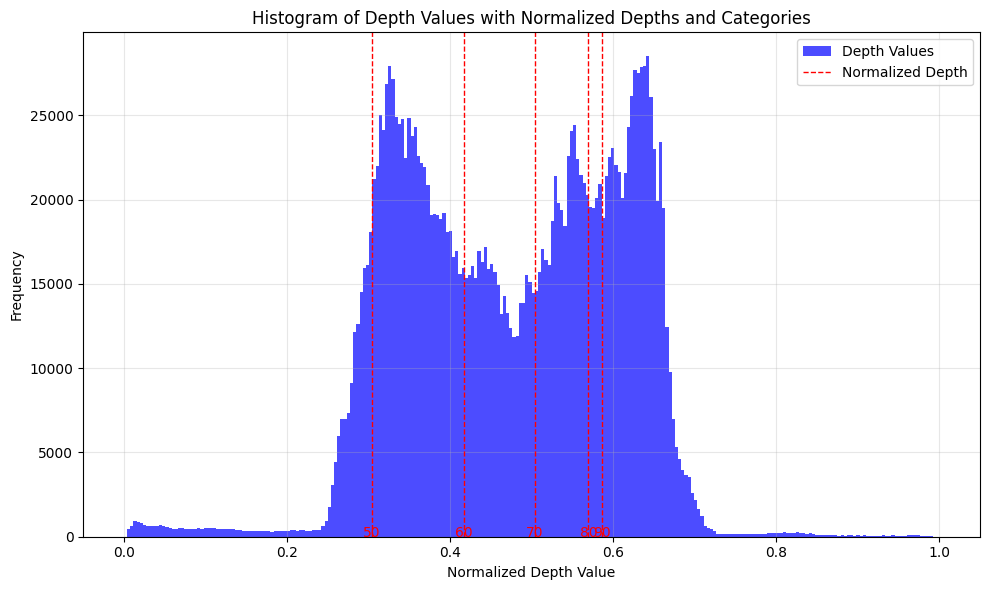

In [50]:
# Load depth map
depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
if depth_map is None:
    print(f"Failed to load depth map at {depth_map_path}.")
else:
    print(f"Depth map loaded successfully from {depth_map_path}.")

    # Normalize depth map if necessary
    if depth_map.dtype == np.uint8:
        depth_values = depth_map.flatten() / 255.0
    elif depth_map.dtype == np.uint16:
        depth_values = depth_map.flatten() / 65535.0
    else:
        depth_values = depth_map.flatten()

    # Remove zero values if desired
    depth_values_nonzero = depth_values[depth_values > 0]

    # Load CSV file
    df = pd.read_csv(csv_file_path)

    # Filter rows where 'depth_map_file' equals the selected depth map filename
    matching_rows = df[df['depth_map_file'] == depth_map_filename]

    # Get 'normalized_depth' values from matching rows
    normalized_depths = matching_rows['normalized_depth'].values
    category_names = matching_rows['category_name'].values

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(depth_values_nonzero, bins=256, range=(0, 1), color='blue', alpha=0.7, label='Depth Values')

    # Plot 'normalized_depth' values on histogram in red and annotate with 'category_name'
    if len(normalized_depths) > 0:
        for idx, (nd, category_name) in enumerate(zip(normalized_depths, category_names)):
            # Plot vertical line
            plt.axvline(x=nd, color='red', linestyle='dashed', linewidth=1, label='Normalized Depth' if idx == 0 else None)
            # Add category name annotation below the line
            plt.text(nd, -5, category_name, color='red', fontsize=10, ha='center')
    else:
        print(f"No matching 'normalized_depth' values found in CSV for {depth_map_filename}.")

    plt.title('Histogram of Depth Values with Normalized Depths and Categories')
    plt.xlabel('Normalized Depth Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()